# Introduction about the dataset

*The dataset has information collected from a company which faces issue with employees leaving the company. The database has information collected from different employees who have left or still staying in the company. The company wants to use your expertise in identifying which is the major contributor for employees leaving the company.* 

1. Satisfaction Level - ranges between 0 & 1 - gives the satisfaction level of the employee
2. last_evaluation - ranges between 0 & 1 - defines the normalised employee's rating in the last appraisal
3. number_project - numeric - No of projects the employee has worked on so far
4. average_monthly_hours - Average amount of hours employee spends in the office per month
5. time_spend_company - Time employee has spent in the company (in months)
6. Work_accident - categorical - If the employee has encountered any accident in the work environment
7. Department - Categorical - Department in which the employee is working/ has worked
8. Salary - Categorical - Divided into low,medium & high 

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib as mp
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as mplt 
import seaborn as sns
#Missing_Values = ["inf","missing", "?"]

### Read the dataset

In [2]:
hr_df = pd.read_csv("hr-analytics.csv")#, na_values = Missing_Values)

### Observe the shape and the type of dataset

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
hr_df.shape

(14999, 10)

### Use summary statistics to check if missing values,outlier  treament is necessary

In [7]:
hr_df.describe().transpose()
#Doesnt seem to have missing values but we can check

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### Data Preprocessing -  Missing values Treatment 
        

In [8]:
missing_values=hr_df.columns[hr_df.isnull().any()]
hr_df[missing_values].isnull().sum()

Series([], dtype: float64)

In [9]:
hr_df[hr_df.isnull().any(axis=1)][missing_values].head()

""


### Dealing with Outliers - Find IQR and remove the row if there are any outlier
       

In [10]:
hr_df.kurtosis(numeric_only  = True)

satisfaction_level       -0.670859
last_evaluation          -1.239040
number_project           -0.495478
average_montly_hours     -1.134982
time_spend_company        4.773211
Work_accident             2.085320
left                     -0.487060
promotion_last_5years    42.054957
dtype: float64

In [11]:
hr_df.skew(numeric_only  = True)

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

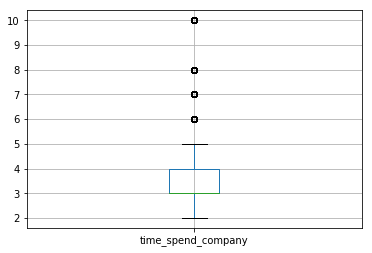

In [12]:
#Find the boxplot of all the columns
#hr_df[['satisfaction_level']].boxplot()
hr_df[['time_spend_company']].boxplot() # Seems to have outliers

In [14]:
#Marking outliers function
#def mark_outlier(df_in, col_name):
#    q1 = df_in[col_name].quantile(0.25)
#    q3 = df_in[col_name].quantile(0.75)
#    iqr = q3-q1 #Interquartile range
#    fence_low  = q1-1.5*iqr
#    fence_high = q3+1.5*iqr
#    #df.loc[df['First Season'] > 1990, 'First Season'] = 1
#    df_in.loc[((df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)),col_name] = np.nan
#    return df_in[col_name]

#q3 = hr_df[['time_spend_company']].quantile(0.75).time_spend_company
#q1 = hr_df[['time_spend_company']].quantile(0.25).time_spend_company
#t = q3-q1
#outliers_above = q3+1.5*t
#outliers_below = q1-1.5*t
t1 = hr_df.copy()
t2 = hr_df.copy()
hr_bak=hr_df.copy()
t1 = t1.mask(t1.sub(t1.mean()).div(t1.std()).abs().gt(2))

In [15]:
t1.describe().transpose()
#hr_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14111.0,0.645007,0.219588,0.12,0.49,0.66,0.83,1.0
last_evaluation,14922.0,0.717902,0.169760,0.38,0.56,0.72,0.87,1.0
number_project,14743.0,3.747541,1.168376,2.00,3.00,4.00,5.00,6.0
average_montly_hours,14751.0,200.539285,48.525711,102.00,156.00,199.00,244.00,300.0
time_spend_company,14435.0,3.305715,1.079039,2.00,3.00,3.00,4.00,6.0
Work_accident,12830.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14680.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
Department,13772.0,6.393552,2.370438,1.00,5.00,7.00,8.00,9.0
salary,13762.0,1.468391,0.499018,1.00,1.00,1.00,2.00,2.0


In [16]:
t1.Work_accident = hr_df.Work_accident
t1.left = hr_df.left
t1.promotion_last_5years = hr_df.promotion_last_5years
t1.Department = hr_df.Department
t1.salary = hr_df.salary
print(t1.isnull().sum())
print(t1.shape[0])
#These are the outlier numbers marked by blanks

satisfaction_level       888
last_evaluation           77
number_project           256
average_montly_hours     248
time_spend_company       564
Work_accident              0
left                       0
promotion_last_5years      0
Department                 0
salary                     0
dtype: int64
14999


In [17]:
#Now cleaning the df of outliers but which are not Ploan = 1 rows
#Making a copy just in case :D
t2=t1.copy()
t2 = t2.drop(t2[(t2.satisfaction_level.isnull() | t2.last_evaluation.isnull() | t2.number_project.isnull() | t2.average_montly_hours.isnull() | t2.time_spend_company.isnull())].index)

In [18]:
t2 = t2.apply(lambda x: x.fillna(x.median()),axis=0)

In [19]:
print(t2.isnull().sum())
print(t2.shape[0])

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
13357


### Dealing with Categorical Values - Use LabelEncoder from skilearn to encode categorical variables

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
hr_df['Department'] = labelencoder.fit_transform(hr_df.Department)
hr_df['salary'] = labelencoder.fit_transform(hr_df.salary)
hr_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1
6,0.10,0.77,6,247,4,0,1,0,7,1
7,0.92,0.85,5,259,5,0,1,0,7,1
8,0.89,1.00,5,224,5,0,1,0,7,1
9,0.42,0.53,2,142,3,0,1,0,7,1


### Use Histogram to Check distribution of dependent variable 

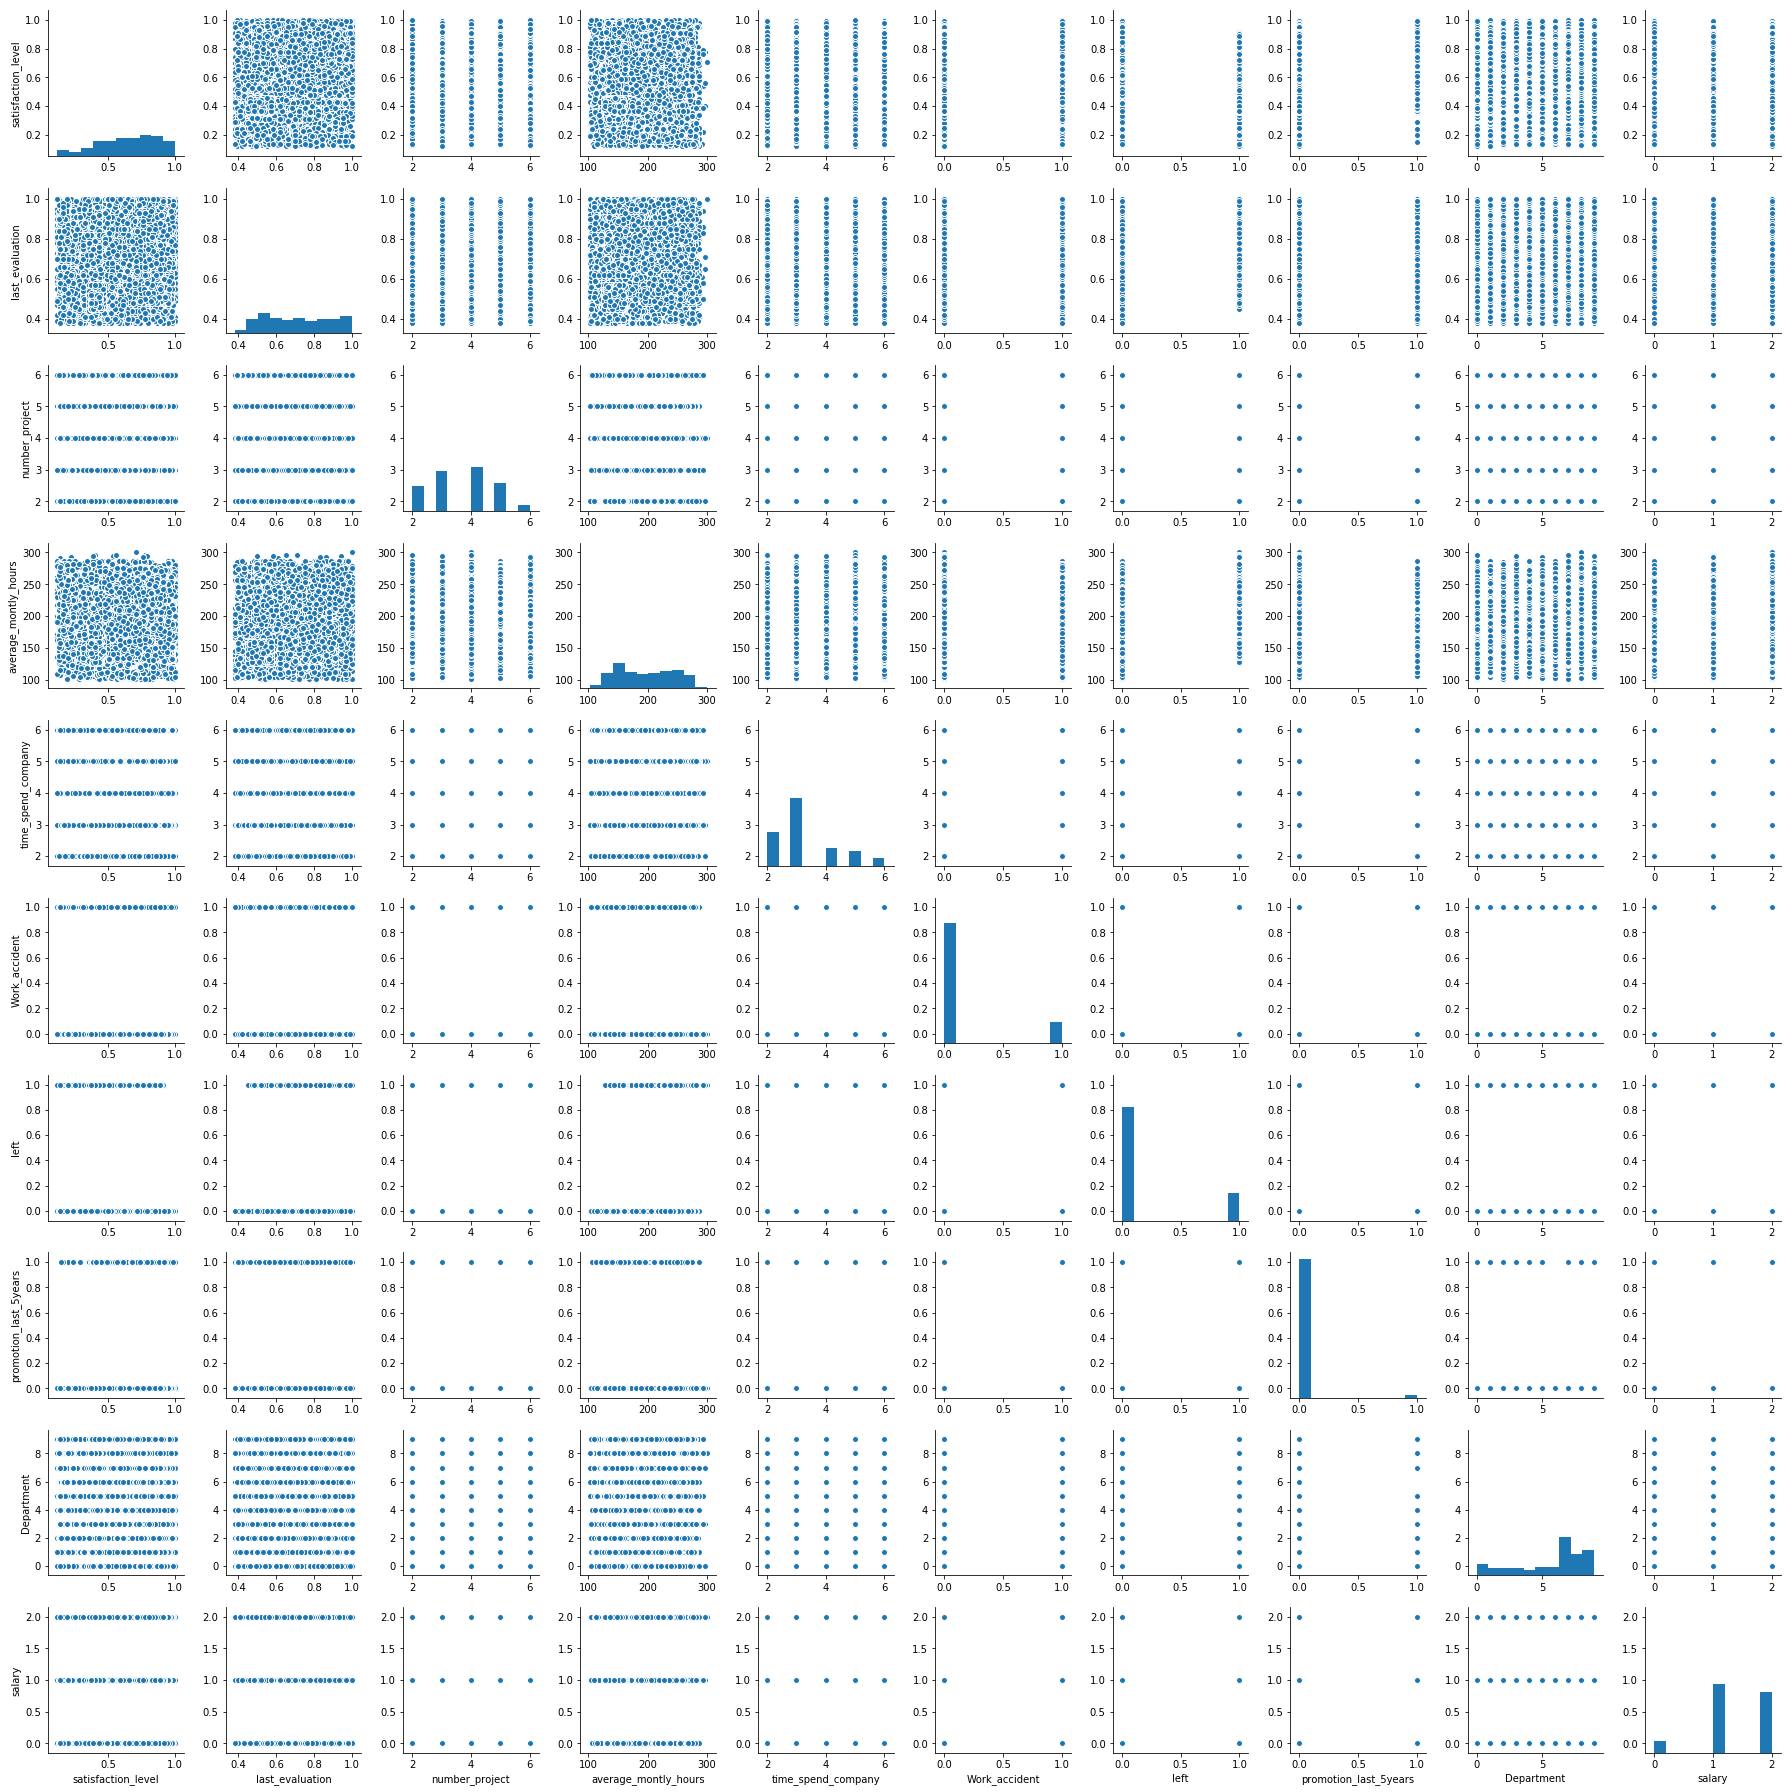

In [20]:
dataframe_attr = t2.iloc[:, 0:10]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(dataframe_attr)

### Use correlation & scatter matrix to observe the dependency between variables (Drop the dependent variable if the abs(correlation) with dependent variable is <0.01)

In [21]:
t2.corr()
# We can drop salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.274903,0.167618,0.231013,-0.089282,0.023627,-0.210861,0.022777,0.009562,0.017363
last_evaluation,0.274903,1.000000,0.300901,0.296367,0.157252,0.012047,-0.117858,0.001454,0.005015,0.013481
number_project,0.167618,0.300901,1.000000,0.305098,0.226330,0.036599,-0.269594,0.015175,0.005858,0.001769
average_montly_hours,0.231013,0.296367,0.305098,1.000000,0.140298,0.024211,-0.138348,0.003132,0.001555,0.006698
time_spend_company,-0.089282,0.157252,0.226330,0.140298,1.000000,-0.026796,0.254231,-0.004413,0.002130,0.013575
Work_accident,0.023627,0.012047,0.036599,0.024211,-0.026796,1.000000,-0.139713,0.042387,0.007112,0.000160
left,-0.210861,-0.117858,-0.269594,-0.138348,0.254231,-0.139713,1.000000,-0.046418,0.030860,-0.008175
promotion_last_5years,0.022777,0.001454,0.015175,0.003132,-0.004413,0.042387,-0.046418,1.000000,-0.016438,0.026099
Department,0.009562,0.005015,0.005858,0.001555,0.002130,0.007112,0.030860,-0.016438,1.000000,0.003467
salary,0.017363,0.013481,0.001769,0.006698,0.013575,0.000160,-0.008175,0.026099,0.003467,1.000000


In [22]:
t2 = t2.drop(["salary"], axis=1) 

In [23]:
t2.head(5) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2.0,157.0,3.0,0,1,0,7
1,0.80,0.86,5.0,262.0,6.0,0,1,0,7
3,0.72,0.87,5.0,223.0,5.0,0,1,0,7
4,0.37,0.52,2.0,159.0,3.0,0,1,0,7
5,0.41,0.50,2.0,153.0,3.0,0,1,0,7


### Standardization of Data


In [24]:
from sklearn.preprocessing import StandardScaler
features = t2.drop(["left"], axis=1) 

scaler = StandardScaler()
hr_df1 = scaler.fit_transform(features)

hr_df2 = pd.DataFrame(hr_df1,columns=features.columns)
hr_df2.head(20) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department
0,-1.219327,-1.051022,-1.502209,-0.852518,-0.227791,-0.416557,-0.137826,0.388536
1,0.701866,0.890427,1.241285,1.397339,2.531528,-0.416557,-0.137826,0.388536
2,0.335925,0.949259,1.241285,0.561678,1.611755,-0.416557,-0.137826,0.388536
3,-1.265070,-1.109854,-1.502209,-0.809663,-0.227791,-0.416557,-0.137826,0.388536
4,-1.082099,-1.227518,-1.502209,-0.938227,-0.227791,-0.416557,-0.137826,0.388536
5,1.250779,0.831596,1.241285,1.333057,1.611755,-0.416557,-0.137826,0.388536
6,1.113550,1.714073,1.241285,0.583105,1.611755,-0.416557,-0.137826,0.388536
7,-1.036356,-1.051022,-1.502209,-1.173926,-0.227791,-0.416557,-0.137826,0.388536
8,-0.899128,-0.992190,-1.502209,-1.323916,-0.227791,-0.416557,-0.137826,0.388536
9,0.884837,1.243418,0.326787,0.797377,1.611755,-0.416557,-0.137826,0.388536


### Use Naive Bayes Modelling and find out the accuracy of the model

In [25]:
X = hr_df2.values
Y = t2.left
#bc_feat = bc_df3.drop(["Class"], axis=1)
#bc_target = bc_df3['Class']
#print(bc_feat.head())
#print(bc_target.head())
#X = array[:,:] # select all rows and first 7 columns which are the attributes
#Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties

In [26]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [27]:
model = GaussianNB()
model.fit(X_train, Y_train)
print(model)
# make predictions

GaussianNB(priors=None)


In [28]:
expected = Y_test
predicted = model.predict(X_test)
# summarize the fit of the model

In [29]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.91      0.82      0.86      3214
          1       0.48      0.66      0.55       794

avg / total       0.82      0.79      0.80      4008



In [30]:
model.score(X_train, Y_train)

0.792170285592042

In [31]:
model.score(X_test,Y_test)

0.7894211576846307

In [32]:
print(metrics.confusion_matrix(expected, predicted))

[[2642  572]
 [ 272  522]]


### Use SVM and find out the accuracy & print the confusion matrix

In [33]:
from sklearn import svm
#clf = svm.SVC(gamma=0.025, C=10)    
clf = svm.SVC()    
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf.fit(X_train , Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_pred=clf.predict(X_test)

In [35]:
clf.score(X_test, Y_test)

0.9613273453093812

In [36]:
clf.score(X_train, Y_train)

0.9669483367205048

In [37]:
print(metrics.confusion_matrix(Y_test, y_pred))

[[3155   59]
 [  96  698]]


### Find out cross - validation scores with 10-fold for both the models

In [38]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 10-fold cross validation for Naïve Bayes Model
scores = cross_val_score(model, X_test , Y_test, cv=10)
print('Naive Bayes Cross-validated scores:', scores)



('Naive Bayes Cross-validated scores:', array([0.73880597, 0.80597015, 0.82089552, 0.81094527, 0.8125    ,
       0.7625    , 0.7775    , 0.8025    , 0.8325    , 0.7775    ]))


/usr/local/anaconda/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Find the Optimal parameters of the SVM model by tuning hyperparameters: Use c Values: (6,7) & Kernels (rbf, linear) 

In [43]:
from sklearn import svm
#clf = svm.SVC(gamma=0.025, C=10)    
clf = svm.SVC(C=6, kernel='linear')    
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))

('Test Scores:', 0.8018962075848304)
('Train Scores:', 0.8011552037651085)
[[3214    0]
 [ 794    0]]


In [44]:
from sklearn import svm
#clf = svm.SVC(gamma=0.025, C=10)    
clf = svm.SVC(C=7, kernel='linear')    
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))

('Test Scores:', 0.8018962075848304)
('Train Scores:', 0.8011552037651085)
[[3214    0]
 [ 794    0]]


In [45]:
from sklearn import svm
#clf = svm.SVC(gamma=0.025, C=10)    
clf = svm.SVC(C=6, kernel='rbf')    
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))

('Test Scores:', 0.9670658682634731)
('Train Scores:', 0.9715477591186223)
[[3175   39]
 [  93  701]]


In [46]:
from sklearn import svm
#clf = svm.SVC(gamma=0.025, C=10)    
clf = svm.SVC(C=7, kernel='rbf')    
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))

('Test Scores:', 0.969061876247505)
('Train Scores:', 0.9725104289228794)
[[3182   32]
 [  92  702]]


### Considering the best hyperparameters and performing CrossValidation

In [47]:
# Perform 10-fold cross validation for SVM Model
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

('SVM Cross-validated scores:', array([0.95522388, 0.95771144, 0.97014925, 0.96268657, 0.965     ,
       0.975     , 0.9675    , 0.9475    , 0.9775    , 0.9625    ]))


### Use Decision Tree and find out the feature importances scores and accuracy of the model

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
dt_model.score(X_test , Y_test)

0.9748003992015968

In [50]:
test_pred = dt_model.predict(X_test)

In [51]:
y_grid = (np.column_stack([test_pred, Y_test]))

In [52]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = features.columns))

                            Imp
satisfaction_level     0.255017
last_evaluation        0.130652
number_project         0.264913
average_montly_hours   0.098550
time_spend_company     0.230444
Work_accident          0.003292
promotion_last_5years  0.000000
Department             0.017133


### Find out cross-validation scores with 10-fold for the above model

In [53]:
# Perform 10-fold cross validation for Decision Tree model
scores = cross_val_score(dt_model, X_test , Y_test, cv=10)
print('Decision Tree Cross-validated scores:', scores)


('Decision Tree Cross-validated scores:', array([0.95771144, 0.97761194, 0.97014925, 0.97761194, 0.9475    ,
       0.97      , 0.9775    , 0.96      , 0.97      , 0.95      ]))


### Compare the accuracy of all the models and find which one is better on the given dataset

## Decision Tree is 97% accuracy
## SVM acores are 96% accuracy
## Naive Byes has only 79% accuracy
## The decision tree provides the bext accuracy